In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats

# Task 4: Generate Descriptive Statistics and Visualizations

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [4]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


4.1 For the "Median value of owner-occupied homes" provide a boxplot

Text(0.5, 1.0, 'Median value of owner-occupied homes')

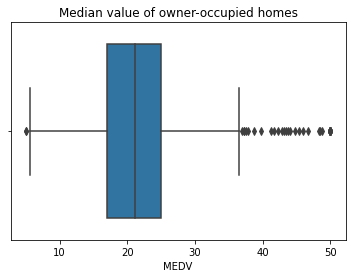

In [7]:
sns.boxplot(x=boston_df.MEDV)
plt.title("Median value of owner-occupied homes")

Finding: The median of these values is about 22000 while there are many outliers after 38000 of upper whisker

4.2 Provide a  histogram for the Charles river variable

<AxesSubplot:>

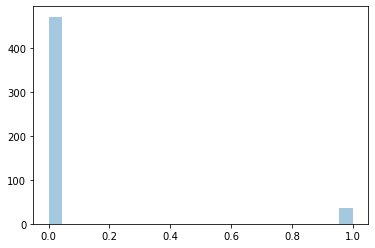

In [12]:
sns.distplot(x=boston_df['CHAS'], kde=False)

Finding: most of tracks do not bound the Charles river

4.3 Provide a boxplot for the MEDV variable vs the AGE variable

In [25]:
boston_df.loc[(boston_df['AGE']<35),'age_group']="35 years and younger"
boston_df.loc[(boston_df['AGE']>=35) & (boston_df['AGE']<70),'age_group']="between 35 and 70 years"
boston_df.loc[(boston_df['AGE']>=70),'age_group']="70 years and older"

In [29]:
boston_df.nunique()

Unnamed: 0    506
CRIM          504
ZN             26
INDUS          76
CHAS            2
NOX            81
RM            446
AGE           356
DIS           412
RAD             9
TAX            66
PTRATIO        46
LSTAT         455
MEDV          229
age_group       3
dtype: int64

<AxesSubplot:xlabel='MEDV', ylabel='age_group'>

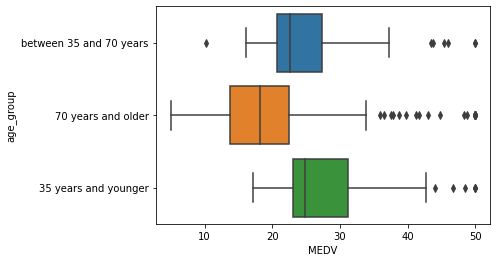

In [38]:
sns.boxplot(x=boston_df.MEDV,y=boston_df['age_group'])

Finding: the age group of 35 years and younger pay the highest Median value of owner-occupied homes

4.4 Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

Text(0.5, 1.0, 'Scatterplot: Nitric oxide concentrations and the proportion of non-retail business acres per town')

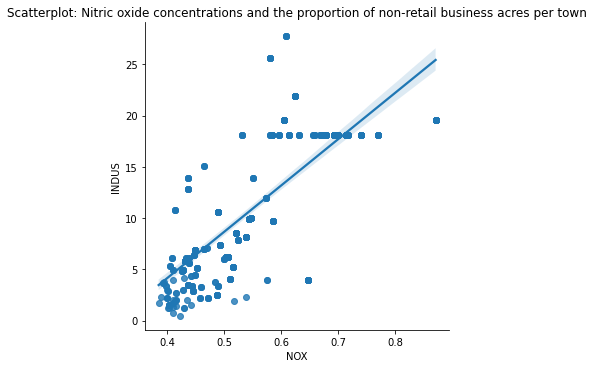

In [50]:
sns.lmplot(x='NOX',y='INDUS', data=boston_df)
plt.title("Scatterplot: Nitric oxide concentrations and the proportion of non-retail business acres per town")

Finding: There is a strong positive correlation between them 

D:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

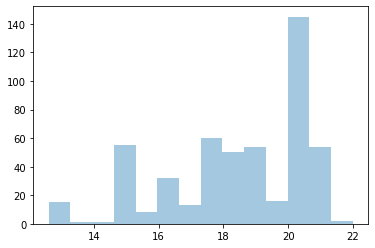

In [52]:
sns.distplot(x=boston_df.PTRATIO, kde=False)

Finding: The highest ratio is 20 pupils per teacher, while the lowest are between 13 and 14 pupils

# Task 5: Use the appropriate tests to answer the questions provided

5.1 Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Null Hypothesis: Both MEDV's are the same

Alternative Hypothesis: Both MEDV's are different on the grounds of tracks

In [63]:
one=boston_df[boston_df['CHAS']==1]['MEDV']
zero=boston_df[boston_df['CHAS']==0]['MEDV']

In [67]:
scipy.stats.ttest_ind(one,zero,equal_var=True)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

conclusion: pvalue is <0.05, we reject the hypothesis and conclude that there is significant difference in median value of houses based on tracks

5.2 Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

*Hypothesis $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)

*Alternative hypothesis H\_1: At least one of the means differ

In [70]:
thirtyfive = boston_df[boston_df['age_group']=="35 years and younger"]['MEDV']
seventy = boston_df[boston_df['age_group']=="between 35 and 70 years"]['MEDV']
elder = boston_df[boston_df['age_group']=="70 years and older"]['MEDV']

In [71]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive, seventy, elder)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


Conculsion: Since the p-value is under 0.05, we reject the null hypothesis as there is significant evidence that at least one of the means differ.

5.3 Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis:

*   $H\_0:$ Nitric oxide concentrations are not correlated with proportion of non-retail business acres per town
    
*   $H\_1:$ Nitric oxide concentrations are correlated with proportion of non-retail business acres per town

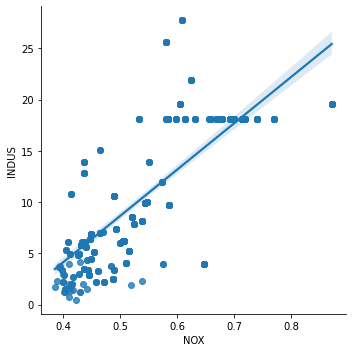

In [75]:
sns.lmplot(x='NOX',y='INDUS', data=boston_df)

In [76]:
scipy.stats.pearsonr(x=boston_df.NOX,y=boston_df.INDUS)

(0.763651446920915, 7.913361061239593e-98)

Conclusion: Since the p-value is < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between the two.

5.4 What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

state the null hypothesis:

*   $H\_0: β1$ = 0 (weighted distance to the five Boston employment centres has no effect on median value of owner occupied homes)
*   $H\_1: β1$ is not equal to 0 (weighted distance to the five Boston employment centres has an effect on median value of owner occupied homes)

In [79]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

D:\Python\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 10 May 2022   Prob (F-statistic):           1.21e-08
Time:                        01:41:17   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion: since the p-value is < 0.05, so we reject the null hypothesis as there is evidence that there is a difference in median value of owner occupied homes based on distance to the five Boston employment centres.